In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Apple SD Gothic Neo'
matplotlib.rcParams['axes.unicode_minus'] = False

In [14]:
df = pd.read_csv('./encode2.csv')

In [27]:
#1. 남성보다 여성이 phq-9 총점이 높다.
import scipy.stats as st

male = df.loc[df['sex']==1, 'phq']
female = df.loc[df['sex']==2, 'phq']

t_stat, p_val = st.ttest_ind(female, male, equal_var=True)  
print("t-stat:", t_stat, "p-value:", p_val)

mean_m, mean_f = male.mean(), female.mean()
print(f'남성평균: {mean_m}, 여성평균:{mean_f}')

t-stat: 53.193411752013475 p-value: 0.0
남성평균: 2.0406280944971, 여성평균:2.7719517834080074


<function matplotlib.pyplot.show(close=None, block=None)>

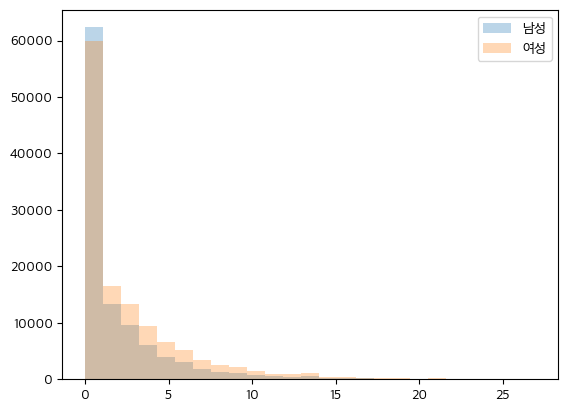

In [33]:
plt.hist(male, bins=25, alpha=0.3, label='남성')
plt.hist(female, bins=25, alpha=0.3, label='여성')
plt.legend()
plt.show

r: 0.07719888880130077 p-value: 7.731210514310664e-303


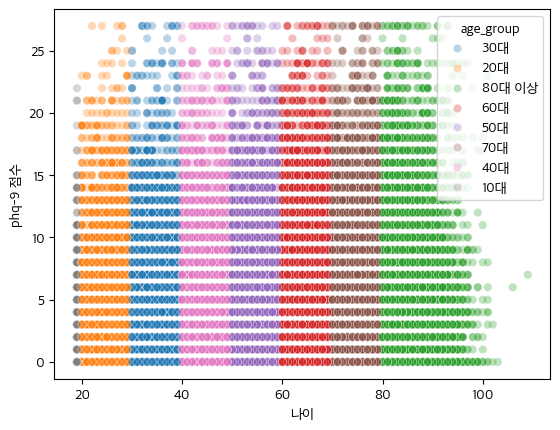

In [ ]:
#2. 나이가 많을수록 phq-9 총점이 높다.

r, p = st.spearmanr(df['age'], df['phq'])
print("r:", r, "p-value:", p)

sns.scatterplot(x=df['age'], y=df['phq'], hue=df['age_group'], alpha=0.3)
plt.xlabel('나이')
plt.ylabel('phq-9 점수')
plt.show()

#상관계수가 0.8로 나이가 많을수록 점수가 높은 경향은 있지만, 상관이 크다고 보기 어려움
#산점도도 고르게 퍼져있음

In [18]:
#3. 중강도, 고강도 신체활동이 많을수록 phq-9 총점이 낮다.

import statsmodels.formula.api as smf

model = smf.ols('phq ~ ph_hard + ph_medium', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    phq   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     157.1
Date:                Fri, 30 May 2025   Prob (F-statistic):           6.27e-69
Time:                        09:30:08   Log-Likelihood:            -6.0574e+05
No. Observations:              231469   AIC:                         1.211e+06
Df Residuals:                  231466   BIC:                         1.212e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4892      0.008    331.760      0.0

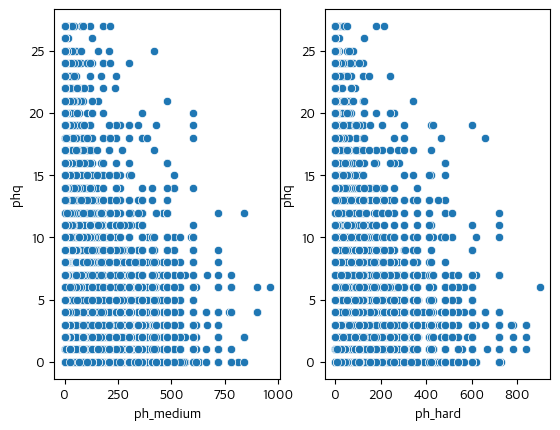

In [49]:
#회귀계수 ph_hard -0.0012 ph_medium -0.0017
#r-squared 낮음..

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='ph_medium', y='phq')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='ph_hard', y='phq')
plt.show()

In [50]:
#4. 수면시간이 너무 적거나 너무 많으면 phq-9 총점이 높다.

df['sleep_mean_2'] = df['sleep_mean']**2

model3 = smf.ols('phq ~ sleep_mean + sleep_mean_2', data=df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    phq   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     6881.
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        09:53:06   Log-Likelihood:            -5.9921e+05
No. Observations:              231469   AIC:                         1.198e+06
Df Residuals:                  231466   BIC:                         1.198e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.4848      0.082    139.687   

<Axes: xlabel='sleep_mean', ylabel='phq'>

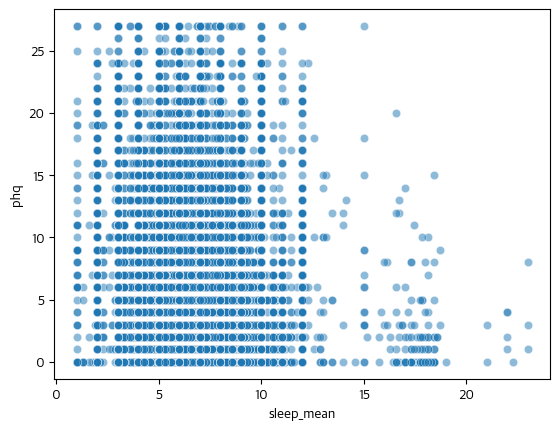

In [53]:
#회귀 계수 sleep_mean -2.79 sleep_mean_2 0.174
#수면 시간이 많아지먄 phq 점수가 내려가지만 너무 많아지면 올라가는 경향이 있음

sns.scatterplot(data=df, x='sleep_mean', y='phq', alpha=0.5)

In [ ]:
formula = 'phq ~ sex + age + sleep_mean + ph_hard + ph_medium + smoke + alcohol + breakfast + bmi + diet'
full = smf.ols(formula, data=df).fit()
print(full.summary())

#phq 점수가 올라가는데 영향을 미치는 요인
#나이 성별 흡연 음주 체중조절경험 여부

#내려가는데 영향을 미치는 요인
#수면 중강도운동 아침식사여부 bmi 


                            OLS Regression Results                            
Dep. Variable:                    phq   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1450.
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        09:32:23   Log-Likelihood:            -5.9886e+05
No. Observations:              231469   AIC:                         1.198e+06
Df Residuals:                  231458   BIC:                         1.198e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3803      0.076     44.421      0.0